<a href="https://colab.research.google.com/github/Tony0027/Artificial-Intelligence-Class/blob/main/Pr%C3%A1ctica%203%20Operaciones%20aritm%C3%A9ticas%20y%20l%C3%B3gicas%20JHJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 3  Operaciones aritméticas y lógicas.

Ejercicio 1: Suma de imágenes.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Cargar imágenes en escala de grises
img1 = cv2.imread('chest1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('chest2.jpeg', cv2.IMREAD_GRAYSCALE)

# Redimensionar si no son del mismo tamaño
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

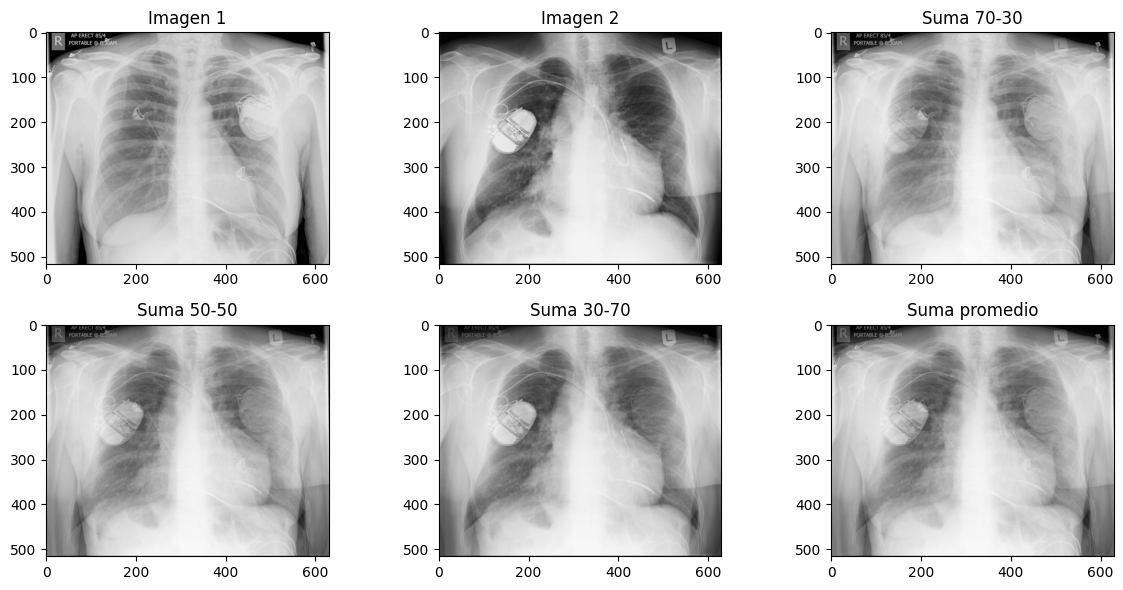

In [ ]:
# Suma ponderada
suma_ponderada1 = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
suma_ponderada2 = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
suma_ponderada3 = cv2.addWeighted(img1, 0.3, img2, 0.7, 0)

# Suma promedio
suma_promedio = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.subplot(2,3,1), plt.imshow(img1, cmap='gray'), plt.title('Imagen 1')
plt.subplot(2,3,2), plt.imshow(img2, cmap='gray'), plt.title('Imagen 2')
plt.subplot(2,3,3), plt.imshow(suma_ponderada1, cmap='gray'), plt.title('Suma 70-30')
plt.subplot(2,3,4), plt.imshow(suma_ponderada2, cmap='gray'), plt.title('Suma 50-50')
plt.subplot(2,3,5), plt.imshow(suma_ponderada3, cmap='gray'), plt.title('Suma 30-70')
plt.subplot(2,3,6), plt.imshow(suma_promedio, cmap='gray'), plt.title('Suma promedio')
plt.tight_layout()
plt.show()

Ejercicio 2: Resta de imágenes

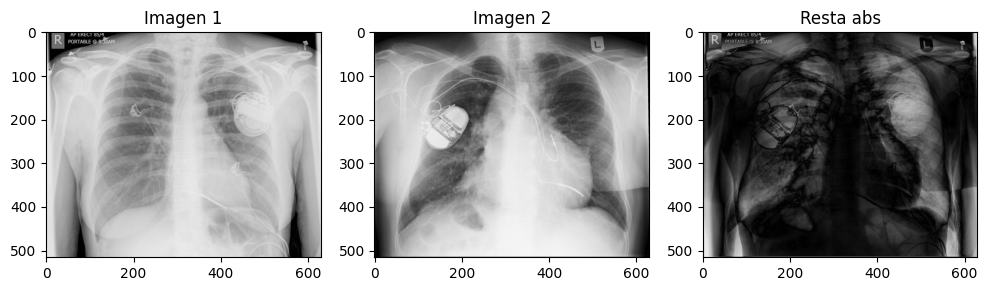

In [ ]:
resta = cv2.absdiff(img1, img2)

# Mostrar resultados
plt.figure(figsize=(10,4))
plt.subplot(1,3,1), plt.imshow(img1, cmap='gray'), plt.title('Imagen 1')
plt.subplot(1,3,2), plt.imshow(img2, cmap='gray'), plt.title('Imagen 2')
plt.subplot(1,3,3), plt.imshow(resta, cmap='gray'), plt.title('Resta abs')
plt.tight_layout()
plt.show()


Ejercicio 3: Multiplicación por un factor.

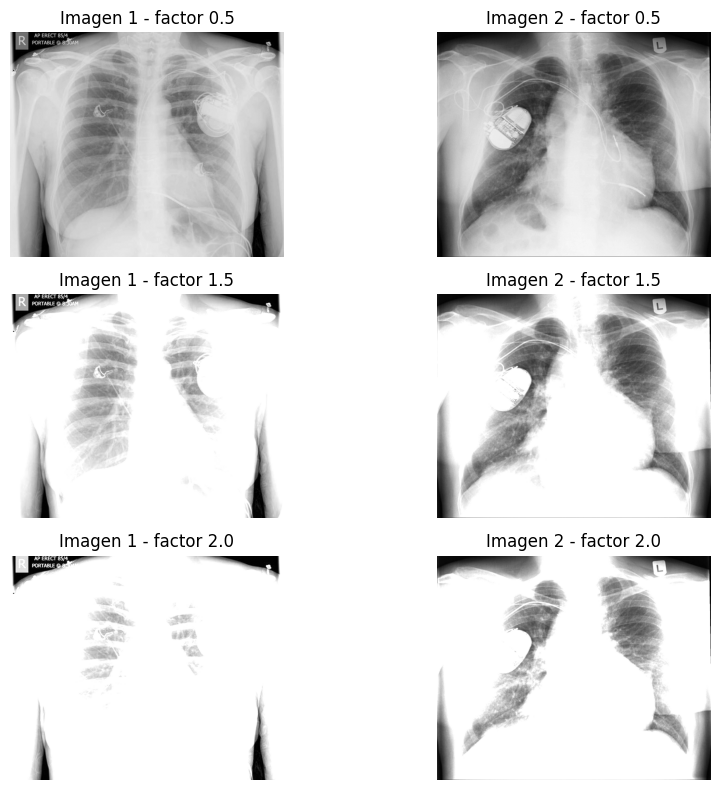

In [ ]:
factores = [0.5, 1.5, 2.0]
imagenes_brillo = []

for factor in factores:
    brillo_img1 = cv2.convertScaleAbs(img1, alpha=factor)
    brillo_img2 = cv2.convertScaleAbs(img2, alpha=factor)
    imagenes_brillo.append((brillo_img1, brillo_img2))

# Mostrar resultados
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
for i, (b1, b2) in enumerate(imagenes_brillo):
    axs[i][0].imshow(b1, cmap='gray')
    axs[i][0].set_title(f'Imagen 1 - factor {factores[i]}')
    axs[i][1].imshow(b2, cmap='gray')
    axs[i][1].set_title(f'Imagen 2 - factor {factores[i]}')
    for ax in axs[i]:
        ax.axis('off')
plt.tight_layout()
plt.show()

Ejercicio 4: Multiplicación elemento por elemento.

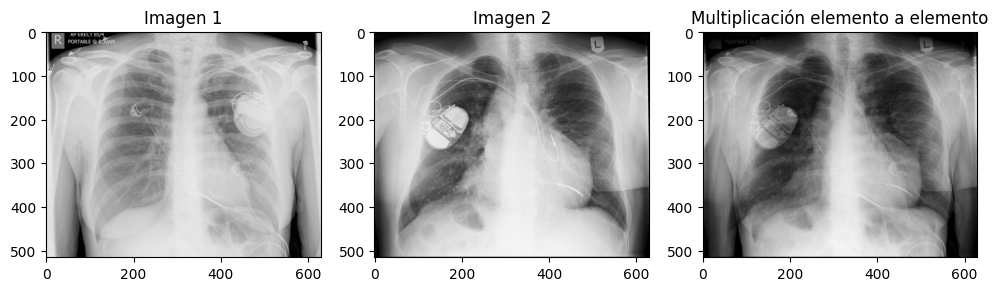

In [ ]:
# Normalizar imágenes a rango 0-1
img1_float = img1.astype(np.float32) / 255.0
img2_float = img2.astype(np.float32) / 255.0

# Multiplicación píxel a píxel
multiplicacion = img1_float * img2_float
multiplicacion = (multiplicacion * 255).astype(np.uint8)

# Mostrar resultados
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1), plt.imshow(img1, cmap='gray'), plt.title('Imagen 1')
plt.subplot(1, 3, 2), plt.imshow(img2, cmap='gray'), plt.title('Imagen 2')
plt.subplot(1, 3, 3), plt.imshow(multiplicacion, cmap='gray'), plt.title('Multiplicación elemento a elemento')
plt.tight_layout()
plt.show()


# Parte II - Operaciones lógicas

Ejercicio 5: AND, OR, XOR, NOT

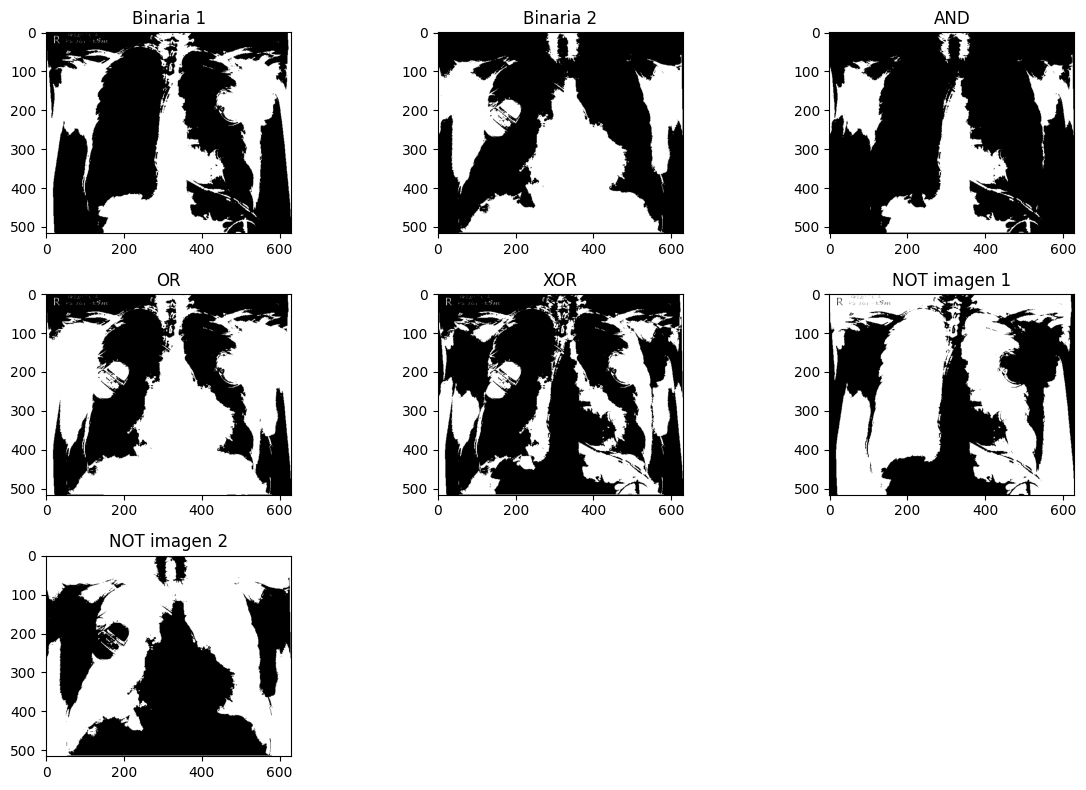

In [ ]:
# Convertir imágenes a binario usando un umbral fijo
_, bin1 = cv2.threshold(img1, 200, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img2, 180, 255, cv2.THRESH_BINARY)

# Operaciones lógicas
and_result = cv2.bitwise_and(bin1, bin2)
or_result  = cv2.bitwise_or(bin1, bin2)
xor_result = cv2.bitwise_xor(bin1, bin2)
not1       = cv2.bitwise_not(bin1)
not2       = cv2.bitwise_not(bin2)

# Mostrar resultados
plt.figure(figsize=(12, 8))

plt.subplot(3,3,1), plt.imshow(bin1, cmap='gray'), plt.title('Binaria 1')
plt.subplot(3,3,2), plt.imshow(bin2, cmap='gray'), plt.title('Binaria 2')
plt.subplot(3,3,3), plt.imshow(and_result, cmap='gray'), plt.title('AND')

plt.subplot(3,3,4), plt.imshow(or_result, cmap='gray'), plt.title('OR')
plt.subplot(3,3,5), plt.imshow(xor_result, cmap='gray'), plt.title('XOR')
plt.subplot(3,3,6), plt.imshow(not1, cmap='gray'), plt.title('NOT imagen 1')

plt.subplot(3,3,7), plt.imshow(not2, cmap='gray'), plt.title('NOT imagen 2')
plt.tight_layout()
plt.show()
